In [6]:
from tkinter import filedialog
import tkinter as tk
import mpmath
import numpy as np
import mne
import EegPreprocessor as preprocessor
import matplotlib.pyplot as plt
import sim_data as sd

In [7]:
print(__doc__)


DEFAULT_EOG = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']


def get_raw_data_file_path():
    root = tk.Tk()
    root.withdraw()
    data_file_path  = filedialog.askopenfilename()
    return data_file_path


#Channel position function for Biosemi machine
def load_biosemi_montage(string = 'biosemi64'):
    montage = mne.channels.make_standard_montage(string)
    return montage


#Loading the raw data
def load_raw_data(filepath, montage, eog = DEFAULT_EOG):
    raw = mne.io.read_raw_bdf(filepath, montage, eog, preload =True)
    return raw


def preprocess_raw_data():
    print("Please enter the raw data file")
    filepath = get_raw_data_file_path()    
    montage = load_biosemi_montage()
    raw = load_raw_data(filepath, montage)            
    return raw


Automatically created module for IPython interactive environment


In [8]:
raw = preprocess_raw_data()

Please enter the raw data file
Extracting EDF parameters from C:\Users\J_CHOWD\Desktop\Project_CAE\data_format_BDF\DATA_bdf_format\BDF\2019-05-03-suject-01-realTask_merged_50_6.5s_trials_for_sim_data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168959  =      0.000 ...   329.998 secs...
DigMontage is a superset of info. 60 in DigMontage will be ignored. The ignored channels are: {'C5', 'P2', 'F4', 'P6', 'F2', 'FC6', 'Iz', 'C6', 'FC2', 'Cz', 'P5', 'F5', 'FC5', 'C3', 'FCz', 'PO4', 'TP7', 'CPz', 'O2', 'P9', 'P4', 'Pz', 'AFz', 'C4', 'CP4', 'C2', 'Fz', 'AF4', 'F3', 'CP3', 'T8', 'F1', 'P10', 'FC3', 'O1', 'PO7', 'C1', 'PO8', 'Fp2', 'T7', 'P1', 'Oz', 'P3', 'F6', 'Fp1', 'POz', 'AF3', 'F8', 'F7', 'CP5', 'FC1', 'CP1', 'P7', 'Fpz', 'PO3', 'CP2', 'P8', 'FC4', 'TP8', 'CP6'}


<ipython-input-7-39b0b2598e54>:22: DeprecationWarning: The `montage` parameter from `read_raw_edf` is deprecated and will be removed  in version 0.20. Use  raw.set_montage(montage) instead.
  raw = mne.io.read_raw_bdf(filepath, montage, eog, preload =True)


In [11]:
#Filtering of the raw signal
raw.filter(0.1,100, fir_design='firwin')

#Notch fitering to remove the line noise
raw.notch_filter(np.arange(60, 241, 60), fir_design='firwin')
    
#Setting the average EEG reference
raw.set_eeg_reference('average', projection=False)

events = mne.find_events(raw, shortest_event=0, stim_channel='Status')

picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=True,
                   exclude='bads')

event_id ={'2-back_spatial': 20, '3-back_spatial': 30, '1-back_nonspatial': 40}
tmin, tmax = -1., 6.5
n_back_epo = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                        baseline=None, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 16897 samples (33.002 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3379 samples (6.600 sec)

EEG channel type selected for re-referencing
Applyi

Working on order: 5
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 6
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 7
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 8
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 9
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 10
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 11
64 matching events found
No baseline correction applied
Not setting metadata
0 projection items 

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 18


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 19


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 20


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)


Working on order: 21


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)


Working on order: 22


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Working on order: 23


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 24


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 25


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 26


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

Working on order: 27


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWarning: Polyfit may be poorly conditioned
  order=order)
C:\Users\J_CHOWD\sim_data.py:173: RankWa

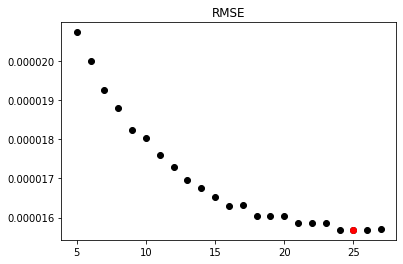

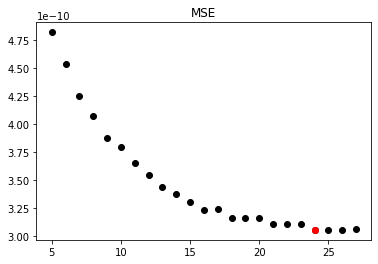

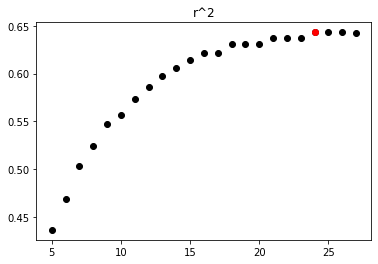

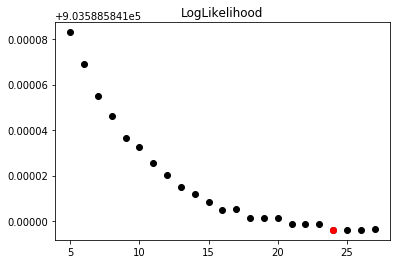

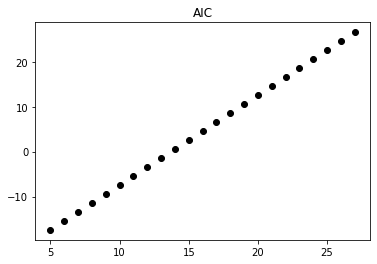

In [12]:
orders = np.arange(5, 28, 1)  # The orders to search
mse_res, rmse_res, r2_res, aic_res, loglik_res = sd.search_for_best_order(n_back_epo,
                                                                          orders=orders, 
                                                                          plot=True)

In [13]:
best_order = orders[np.asarray(mse_res).argmin()]
print(best_order)

5


In [14]:
n_back_sim_data = sd.make_sim_data(n_back_epo, baseline=(None, -0.1), order=17)

C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  

C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  

C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  

64 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  sim_data = _make_sim_data_epochs(data, baseline=baseline, order=order)
C:\Users\J_CHOWD\sim_data.py:26: RankWarning: Polyfit may be poorly conditioned
  

In [15]:
def final_band_power_sim(raw,channel,N,fs,tmin=None, tmax=None,epoch_time=2):
    """
    raw = Mne.raw object
    picks = no. of channels to include, type must be string
    N = No. of samples for FFT algorithm
    fs = sampling frequecy 
    tmin = starting time of the trials
    tmax = end time of the trials
    epoch_time = duration of the epoch by default 2 seconds
    """
    raw = raw.pick(picks=channel)
    
    if (tmin==None and tmax == None):
        n_epochs = 50
    else:
        n_epochs = int((tmax-tmin)/epoch_time)
    
    data = raw.get_data()
    data = data.transpose(1,2,0).reshape(len(raw.ch_names),-1)
    data = data/1e-06 # Unit conversion to microvolts from volts
     
    n_channels = len(raw.ch_names)
    epoch_power_45_70Hz = np.zeros((n_channels,n_epochs,1),dtype = 'float')
    
    for chan in range(n_channels):
        for epoch in range(n_epochs):
            epoch_data = data[chan, ((N*epoch)+1):(N*(epoch+1)+1)] #Formation of 2s epoch data with N samples
            epoch_data = np.fft.fft(epoch_data, N)
            
            #calculation of k in the formula
            k_lower = int(45*(N/fs)) # Forcing these to integers otherwise index error problem 
            # will pop up 
            k_upper = int(70*(N/fs))
            
            temp = np.zeros((50),dtype='float')
            
            for k in range(k_lower, k_upper):
                #val = (np.abs(epoch_data[k_lower])) ** 2
                val = (np.abs(epoch_data[k_lower])) ** 2 + (np.abs(epoch_data[N - k_lower])) ** 2
                temp[(k-90)] = val
            
            power_45_70Hz = (1/N**2)*sum(temp)
            epoch_power_45_70Hz[chan,epoch] = power_45_70Hz
            
    return epoch_power_45_70Hz

Setting the raw objects according to the primary electrodes and their 5 adjacent channels
highly affected by frontalis and temporalis muscle. 

In [16]:
primary_raw = n_back_sim_data.copy()
primary_picks = ['AF7','AF8','FT7','FT8']
primary_power_45_70Hz = final_band_power_sim(primary_raw, channel = primary_picks, N=1024,fs=512)
#primary_raw = primary_raw.pick(picks = primary_picks)



In [22]:
primary_power_45_70Hz[2,1:].mean(dtype='float') + 1 *primary_power_45_70Hz[2,1:].std(dtype='float')

0.31988980502486863

In [ ]:
AF7_raw = n_back_sim_data.copy()
AF7_picks = ['Fp1', 'AF3', 'F3', 'F5', 'F7']
AF7_power_45_70Hz = final_band_power_sim(AF7_raw, channel = AF7_picks, N=1024,fs=512)
#AF7_raw = AF7_raw.pick(picks = AF7_picks)

AF8_raw = n_back_sim_data.copy()
AF8_picks = ['Fp2', 'AF4', 'F4', 'F6', 'F8']
AF8_power_45_70Hz = final_band_power_sim(AF8_raw, channel = AF8_picks, N=1024,fs=512)
#AF8_raw = AF8_raw.pick(picks = AF8_picks)

FT7_raw = n_back_sim_data.copy()
FT7_picks = ['F7', 'F5', 'FC5', 'C5', 'T7'] 
FT8_power_45_70Hz = final_band_power_sim(FT7_raw, channel = FT7_picks, N=1024,fs=512)
#FT7_raw = FT7_raw.pick(picks = FT7_picks)

FT8_raw = n_back_sim_data.copy()
FT8_picks = ['F8', 'F6', 'FC6', 'C6', 'T8'] 
FT8_power_45_70Hz = final_band_power_sim(FT8_raw, channel = FT8_picks, N=1024,fs=512)

#FT8_raw = FT8_raw.pick(picks = FT8_picks)
Fz_raw = n_back_sim_data.copy()
Fz_picks = ['Fz'] 
Fz_power_45_70Hz = final_band_power_sim(Fz_raw, channel = Fz_picks, N=1024,fs=512)

In [23]:
n_back_sim_data = n_back_sim_data.pick(picks = 'Fz')

In [24]:
n_back_sim_data.get_data().shape

(277, 1, 3841)

In [26]:
n_back_sim_data.get_data().transpose(1,2,0).reshape(1,-1).shape

(1, 1063957)

In [20]:
a = data.transpose(1,2,0).reshape(72,-1)

In [21]:
a.shape

(72, 1063957)

Real data of the 'N'-back task


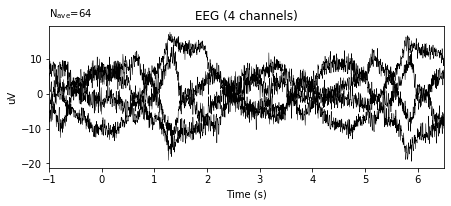

Simulated data of the 'N'-back task


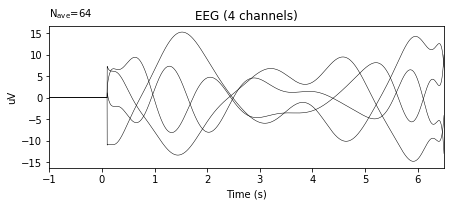

In [23]:
print("Real data of the 'N'-back task")
n_back_epo.average().plot();
print("Simulated data of the 'N'-back task")
n_back_sim_data.average().plot();

The difference between real and simulated data


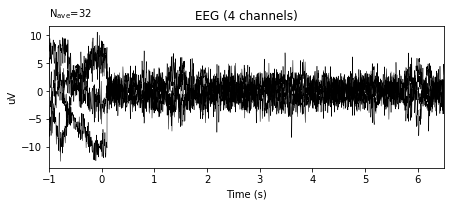

In [24]:
diff = mne.combine_evoked([n_back_epo.average(), - n_back_sim_data.average()], weights="equal")
print("The difference between real and simulated data")
diff.plot();

## Problem: Issue: Loss of spectral information

N-nack data Power Spectral Density
    Using multitaper spectrum estimation with 7 DPSS windows


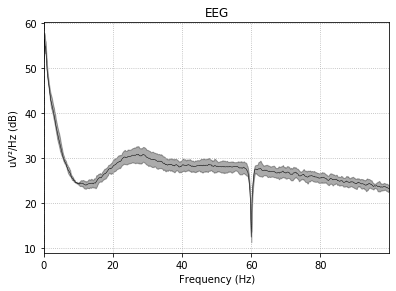

N-back simulated data Power Spectral Density
    Using multitaper spectrum estimation with 7 DPSS windows


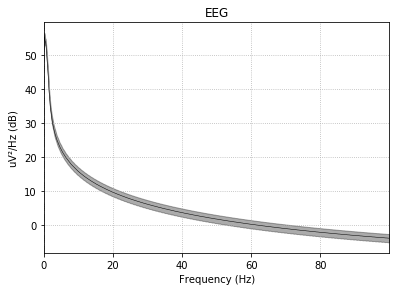

In [25]:
print("N-nack data Power Spectral Density")
n_back_epo.plot_psd(fmax=100, spatial_colors = False,average =True);
print("N-back simulated data Power Spectral Density")
n_back_sim_data.plot_psd(fmax=100, spatial_colors = False,average =True);